In [1]:
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()
import pandas as pd
X=pd.DataFrame(boston.data[:100,:], columns=boston.feature_names)
y=boston.target[:100]

In [2]:
#説明変数をLSTATだけにする
x=X['LSTAT'].values

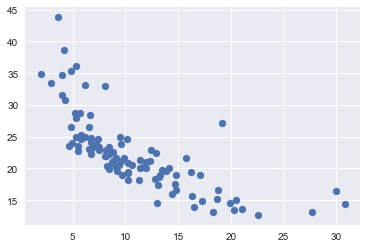

In [3]:
#散布図描画
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.scatter(x,y)

In [4]:
#線形回帰のインスタンス
from sklearn.linear_model import LinearRegression
lin_1d = LinearRegression()

In [5]:
#パラメータ（傾き・切片）を求める　fitの引数は行列のため　x[:,None]　にする
lin_1d.fit(x[:,None],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#ndimで次元を求める　ベクトル１、行列２
x.ndim

1

In [8]:
x[:,None].ndim

2

<function matplotlib.pyplot.plot>

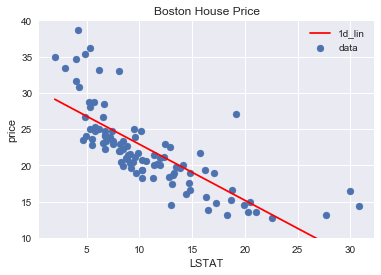

In [12]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞っているだけです。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot

In [13]:
#LSTATが２５の場合の予測値
lin_1d.predict(25)

array([ 11.30238006])

In [14]:
#二次関数でフィッティングするために二乗の項を作る
from sklearn.preprocessing import PolynomialFeatures
degree_2=PolynomialFeatures(degree=2)

In [16]:
x_2=degree_2.fit_transform(x[:,None])
x_2

array([[   1.    ,    4.98  ,   24.8004],
       [   1.    ,    9.14  ,   83.5396],
       [   1.    ,    4.03  ,   16.2409],
       [   1.    ,    2.94  ,    8.6436],
       [   1.    ,    5.33  ,   28.4089],
       [   1.    ,    5.21  ,   27.1441],
       [   1.    ,   12.43  ,  154.5049],
       [   1.    ,   19.15  ,  366.7225],
       [   1.    ,   29.93  ,  895.8049],
       [   1.    ,   17.1   ,  292.41  ],
       [   1.    ,   20.45  ,  418.2025],
       [   1.    ,   13.27  ,  176.0929],
       [   1.    ,   15.71  ,  246.8041],
       [   1.    ,    8.26  ,   68.2276],
       [   1.    ,   10.26  ,  105.2676],
       [   1.    ,    8.47  ,   71.7409],
       [   1.    ,    6.58  ,   43.2964],
       [   1.    ,   14.67  ,  215.2089],
       [   1.    ,   11.69  ,  136.6561],
       [   1.    ,   11.28  ,  127.2384],
       [   1.    ,   21.02  ,  441.8404],
       [   1.    ,   13.83  ,  191.2689],
       [   1.    ,   18.72  ,  350.4384],
       [   1.    ,   19.88  ,  395

In [18]:
#２次関数でフィッティングを行う
lin_2d = LinearRegression()
lin_2d.fit(x_2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<function matplotlib.pyplot.plot>

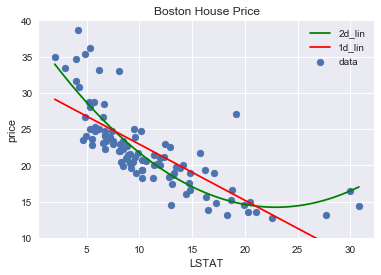

In [20]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot

In [24]:
from sklearn.metrics import mean_squared_error
#1次関数の2乗和誤差
mean_squared_error(y,lin_1d.predict(x[:,None]))

15.537906007479371

In [25]:
#２次関数の2乗和誤差
mean_squared_error(y,lin_2d.predict(x_2))

10.920226905348915

In [36]:
#３次関数でフィッティングを行うため、３乗の項を作る
degree_3=PolynomialFeatures(degree=3)

#4次関数でフィッティングを行うため、4乗の項を作る
degree_4=PolynomialFeatures(degree=4)

In [38]:
x_3=degree_3.fit_transform(x[:,None])
x_3
x_4=degree_4.fit_transform(x[:,None])
x_4

array([[  1.00000000e+00,   4.98000000e+00,   2.48004000e+01,
          1.23505992e+02,   6.15059840e+02],
       [  1.00000000e+00,   9.14000000e+00,   8.35396000e+01,
          7.63551944e+02,   6.97886477e+03],
       [  1.00000000e+00,   4.03000000e+00,   1.62409000e+01,
          6.54508270e+01,   2.63766833e+02],
       [  1.00000000e+00,   2.94000000e+00,   8.64360000e+00,
          2.54121840e+01,   7.47118210e+01],
       [  1.00000000e+00,   5.33000000e+00,   2.84089000e+01,
          1.51419437e+02,   8.07065599e+02],
       [  1.00000000e+00,   5.21000000e+00,   2.71441000e+01,
          1.41420761e+02,   7.36802165e+02],
       [  1.00000000e+00,   1.24300000e+01,   1.54504900e+02,
          1.92049591e+03,   2.38717641e+04],
       [  1.00000000e+00,   1.91500000e+01,   3.66722500e+02,
          7.02273587e+03,   1.34485392e+05],
       [  1.00000000e+00,   2.99300000e+01,   8.95804900e+02,
          2.68114407e+04,   8.02466419e+05],
       [  1.00000000e+00,   1.7100000

In [39]:
#３次関数でフィッティングを行う
lin_3d = LinearRegression()
lin_3d.fit(x_3,y)
#4次関数でフィッティングを行う
lin_4d = LinearRegression()
lin_4d.fit(x_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<function matplotlib.pyplot.plot>

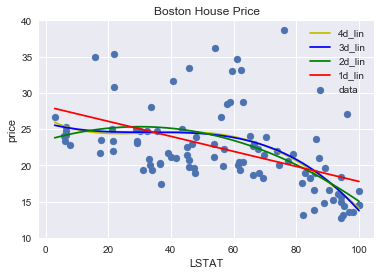

In [58]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_4d_fit,'y',label="4d_lin")
plt.plot(n,y_3d_fit,'b',label="3d_lin")
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("LSTAT")
plt.ylabel("price")
plt.legend()
plt.plot

In [41]:
#1次関数の2乗和誤差
mean_squared_error(y,lin_1d.predict(x[:,None]))

15.537906007479371

In [42]:
#２次関数の2乗和誤差
mean_squared_error(y,lin_2d.predict(x_2))

10.920226905348915

In [43]:
#３乗の2乗和誤差
mean_squared_error(y,lin_3d.predict(x_3))

10.055225709746381

In [44]:
#4乗の２乗和誤差
mean_squared_error(y,lin_4d.predict(x_4))

9.6173907154166862

In [45]:
#説明変数をAGEにする
x=X['AGE'].values

In [51]:
#３次関数でフィッティングを行うため、３乗の項を作る
degree_3=PolynomialFeatures(degree=3)

#4次関数でフィッティングを行うため、4乗の項を作る
degree_4=PolynomialFeatures(degree=4)

In [52]:
x_2=degree_2.fit_transform(x[:,None])
x_3=degree_3.fit_transform(x[:,None])
x_4=degree_4.fit_transform(x[:,None])

In [55]:
lin_1d.fit(x[:,None],y)

lin_2d = LinearRegression()
lin_2d.fit(x_2,y)

lin_3d = LinearRegression()
lin_3d.fit(x_3,y)

lin_4d = LinearRegression()
lin_4d.fit(x_4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<function matplotlib.pyplot.plot>

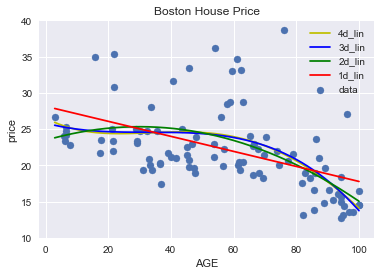

In [57]:
#まずプロット用のデータを用意します。
n = np.linspace(np.min(x),np.max(x), 1000)
y_4d_fit=lin_4d.predict(degree_4.fit_transform(n[:,np.newaxis]))
y_3d_fit=lin_3d.predict(degree_3.fit_transform(n[:,np.newaxis]))
y_2d_fit=lin_2d.predict(degree_2.fit_transform(n[:,np.newaxis]))
y_1d_fit=lin_1d.predict(n[:,np.newaxis])

plt.title("Boston House Price")
plt.scatter(x,y,label='data')
plt.plot(n,y_4d_fit,'y',label="4d_lin")
plt.plot(n,y_3d_fit,'b',label="3d_lin")
plt.plot(n,y_2d_fit,'g',label='2d_lin')
plt.plot(n,y_1d_fit,'r',label='1d_lin')
plt.ylim(10,40)#グラフを見やすくするためにｙ軸のプロット範囲を絞ります。
plt.xlabel("AGE")
plt.ylabel("price")
plt.legend()
plt.plot

In [59]:
#1次関数の2乗和誤差
mean_squared_error(y,lin_1d.predict(x[:,None]))

26.754508704139507

In [60]:
#２次関数の2乗和誤差
mean_squared_error(y,lin_2d.predict(x_2))

24.397088136515954

In [61]:
#3次関数の2乗和誤差
mean_squared_error(y,lin_3d.predict(x_3))

23.978242199677435

In [62]:
#4次関数の2乗和誤差
mean_squared_error(y,lin_4d.predict(x_4))

23.95681697681929